In [157]:
import wandb
import os

WANDB_USER = 'nikebless-thesis'
WANDB_PROJECT = 'ibc'
SAVEDIR = '../_models'

os.makedirs(SAVEDIR, exist_ok=True)

models = { 
    'ebm-unregularized-v1': '2fszoqji',
    'ebm-unregularized-v2': '2rnlr80k',
    'ebm-unregularized-v3': '2h2223nm',

    'mae-v1': '13vssg6f',
    'mae-v2': '1369ywfp',
    'mae-v3': '17q16jkl',

    'ebm-regularized-v1': '2x8qclz8',
    'ebm-regularized-v2': '31ua9ivf',
    'ebm-regularized-v3': '9bwouhzr',

    'ebm-50%-v1': '3dbratb5', # TODO: download
    'ebm-10%-v1': '3dabg6cd',
    'mae-50%-v1': '2keinev2',
    'mae-10%-v1': '1i1dadsh',
}

### Download models from Wandb

In [5]:
api = wandb.Api()

for model_name, run_hash in models.items():

    run = api.run(f"{WANDB_USER}/{WANDB_PROJECT}/{run_hash}")

    output_path = os.path.join(SAVEDIR, f'{model_name}.pt')
    if not os.path.exists(output_path):
        last_pt_model = [file for file in run.files() if file.name.endswith('last.pt')][0]
        last_pt_model.download()
        os.rename(last_pt_model.name, output_path)
        print(f'Saved {model_name} to {output_path}.')
    else:
        print(f'Skipping {model_name} because it\'s already downloaded.')

    last_onnx_models = [file for file in run.files() if file.name.endswith('last.onnx')]
    output_path = os.path.join(SAVEDIR, f'{model_name}.onnx')
    if len(last_onnx_models) and not os.path.exists(output_path):
        last_onnx_model = last_onnx_models[0]
        last_onnx_model.download()
        os.rename(last_onnx_model.name, output_path)
        print(f'Saved {model_name} to {output_path}.')
    else:
        print(f'Skipping {model_name} because it\'s already downloaded.')

Skipping ebm-unregularized-v1 because it's already downloaded.
Skipping ebm-unregularized-v1 because it's already downloaded.
Skipping ebm-unregularized-v2 because it's already downloaded.
Skipping ebm-unregularized-v2 because it's already downloaded.
Skipping ebm-unregularized-v3 because it's already downloaded.
Skipping ebm-unregularized-v3 because it's already downloaded.
Skipping mae-v1 because it's already downloaded.
Skipping mae-v1 because it's already downloaded.
Skipping mae-v2 because it's already downloaded.
Skipping mae-v2 because it's already downloaded.
Skipping mae-v3 because it's already downloaded.
Skipping mae-v3 because it's already downloaded.
Skipping ebm-regularized-v1 because it's already downloaded.
Skipping ebm-regularized-v1 because it's already downloaded.
Skipping ebm-regularized-v2 because it's already downloaded.
Skipping ebm-regularized-v2 because it's already downloaded.
Skipping ebm-regularized-v3 because it's already downloaded.
Skipping ebm-regularize

### Convert models to ONNX

In [6]:
import sys
import os
sys.path.append('/home/nikita/e2e-driving/')

from scripts.pt_to_onnx import convert_pt_to_onnx

conf = {
    'steering_bound': 4.5,
    'use_constant_samples': True,
}

for model_name in models.keys():
    if 'ebm' in model_name:
        pt_model_path = os.path.join(SAVEDIR, f'{model_name}.pt')
        onnx_steering_model_path = pt_model_path.replace('.pt', '.onnx')
        onnx_energy_model_path = pt_model_path.replace('.pt', '-energy.onnx')

        if not os.path.exists(onnx_steering_model_path):
            steering_model_path = convert_pt_to_onnx(pt_model_path, 1, onnx_steering_model_path, with_choice=True, n_samples=1024, iters=0, args=conf)
            print(f'Converted steering model {model_name} to {onnx_steering_model_path}.')
        else:
            print(f'Skipping steering model {model_name} because it\'s already downloaded.')

        if not os.path.exists(onnx_energy_model_path):
            energy_model_path = convert_pt_to_onnx(pt_model_path, 256, onnx_energy_model_path, with_choice=False, n_samples=1024, iters=0, args=conf)
            print(f'Converted energy model {model_name} to {onnx_energy_model_path}.')
        else:
            print(f'Skipping energy model {model_name} because it\'s already downloaded.')


Skipping steering model ebm-unregularized-v1 because it's already downloaded.
Skipping energy model ebm-unregularized-v1 because it's already downloaded.
Skipping steering model ebm-unregularized-v2 because it's already downloaded.
Skipping energy model ebm-unregularized-v2 because it's already downloaded.
Skipping steering model ebm-unregularized-v3 because it's already downloaded.
Skipping energy model ebm-unregularized-v3 because it's already downloaded.
Skipping steering model ebm-regularized-v1 because it's already downloaded.
Skipping energy model ebm-regularized-v1 because it's already downloaded.
Skipping steering model ebm-regularized-v2 because it's already downloaded.
Skipping energy model ebm-regularized-v2 because it's already downloaded.
Skipping steering model ebm-regularized-v3 because it's already downloaded.
Skipping energy model ebm-regularized-v3 because it's already downloaded.
/data/Bolt/dataset-new-small/summer2021/2021-05-28-15-19-48_e2e_sulaoja_20_30: length=10

/data/Bolt/dataset-new-small/summer2021/2021-10-14-13-08-51_e2e_rec_vahi_backwards: length=13442, filtered=0


/home/nikita/e2e-driving/ibc/optimizers.py:120: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  batch_size = num_samples // self.inference_samples
/home/nikita/miniconda3/envs/e2e/lib/python3.9/site-packages/torch/onnx/symbolic_opset9.py:2905: UserWarning: Exporting aten::index operator of advanced indexing in opset 9 is achieved by combination of multiple ONNX operators, including Reshape, Transpose, Concat, and Gather. If indices include negative values, the exported graph will produce incorrect results.
  warnings.warn("Exporting aten::index operator of advanced indexing in opset " +


Converted steering model ebm-10%-v1 to ../_models/ebm-10%-v1.onnx.
/data/Bolt/dataset-new-small/summer2021/2021-05-28-15-19-48_e2e_sulaoja_20_30: length=10708, filtered=0
/data/Bolt/dataset-new-small/summer2021/2021-06-07-14-20-07_e2e_rec_ss6: length=25836, filtered=1
/data/Bolt/dataset-new-small/summer2021/2021-06-07-14-06-31_e2e_rec_ss6: length=3003, filtered=0
/data/Bolt/dataset-new-small/summer2021/2021-06-07-14-09-18_e2e_rec_ss6: length=4551, filtered=1
/data/Bolt/dataset-new-small/summer2021/2021-06-07-14-36-16_e2e_rec_ss6: length=25368, filtered=1
/data/Bolt/dataset-new-small/summer2021/2021-09-24-14-03-45_e2e_rec_ss11_backwards: length=25172, filtered=0
/data/Bolt/dataset-new-small/summer2021/2021-10-26-10-49-06_e2e_rec_ss20_elva: length=33045, filtered=0
/data/Bolt/dataset-new-small/summer2021/2021-10-26-11-08-59_e2e_rec_ss20_elva_back: length=33281, filtered=0
/data/Bolt/dataset-new-small/summer2021/2021-10-20-15-11-29_e2e_rec_vastse_ss13_17_back: length=26763, filtered=0
/da

# Online evaluations

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
final_intervention_counts = {
    '2022-08-04-18-03-44_elva_forward_ebm_unregularized_v1': 7,
    '2022-08-04-17-51-50_elva_back_ebm_unregularized_v1': 5, # TODO: (7 original, #2 misclick, #7 forgot to turn off, #5 and #6 unsure, check video) 17:13
    '2022-08-05-16-52-29_elva_forward_ebm_unregularized_v2': 3,
    '2022-08-05-16-41-01_elva_back_ebm_unregularized_v2': 2,
    '2022-08-05-17-15-21_elva_forward_ebm_unregularized_v3': 4,
    '2022-08-05-17-04-06_elva_back_ebm_unregularized_v3': 1, # TODO: (1 original, #1 unsure check video) 17:28
    
    '2022-08-04-16-45-09_elva_forward_ebm_regularized_v1': 4,
    '2022-08-04-16-33-18_elva_back_ebm_regularized_v1': 5,
    '2022-08-04-17-11-04_elva_forward_ebm_regularized_v2': 2,
    '2022-08-04-16-59-31_elva_back_ebm_regularized_v2': 5,
    '2022-08-04-17-33-33_elva_forward_ebm_regularized_v3': 6,
    '2022-08-04-17-21-58_elva_back_ebm_regularized_v3': 12,
    
    '2022-08-05-17-34-49_elva_forward_mae_v1': 1,
    '2022-08-05-15-01-41_elva_back_mae_v1': 4,
    '2022-08-05-15-13-34_elva_forward_mae_v2': 5, # TODO: (5 original, check video) 17:46
    '2022-08-05-15-24-15_elva_back_mae_v2': 3,
    '2022-08-05-15-35-19_elva_forward_mae_v3': 10, # TODO: (10 original, comment: sudden swerves, check video) 18:01
    '2022-08-05-15-46-06_elva_back_mae_v3': 6,
}

In [7]:
def parse_bag_name(bag_name):
    '''Retuns direction and model name from bag name.'''
    direction = 'forward' if len(bag_name.split('_forward_')) > 1 else 'back'
    model_name = bag_name.split(f'_{direction}_')[-1].replace('_', '-')
    return direction, model_name

In [8]:
model_performance = []

for bag_name, n_interventions in final_intervention_counts.items():
    direction, model_name = parse_bag_name(bag_name)

    perf = {}
    perf['bag_name'] = bag_name
    perf['model_name'] = model_name
    perf['direction'] = direction
    perf['n_interventions'] = n_interventions

    model_performance.append(perf)

performance_df = pd.DataFrame(model_performance)
performance_df

,bag_name,model_name,direction,n_interventions
0,2022-08-04-18-03-44_elva_forward_ebm_unregular...,ebm-unregularized-v1,forward,7
1,2022-08-04-17-51-50_elva_back_ebm_unregularize...,ebm-unregularized-v1,back,5
2,2022-08-05-16-52-29_elva_forward_ebm_unregular...,ebm-unregularized-v2,forward,3
3,2022-08-05-16-41-01_elva_back_ebm_unregularize...,ebm-unregularized-v2,back,2
4,2022-08-05-17-15-21_elva_forward_ebm_unregular...,ebm-unregularized-v3,forward,4
5,2022-08-05-17-04-06_elva_back_ebm_unregularize...,ebm-unregularized-v3,back,1
6,2022-08-04-16-45-09_elva_forward_ebm_regulariz...,ebm-regularized-v1,forward,4
7,2022-08-04-16-33-18_elva_back_ebm_regularized_v1,ebm-regularized-v1,back,5
8,2022-08-04-17-11-04_elva_forward_ebm_regulariz...,ebm-regularized-v2,forward,2
9,2022-08-04-16-59-31_elva_back_ebm_regularized_v2,ebm-regularized-v2,back,5


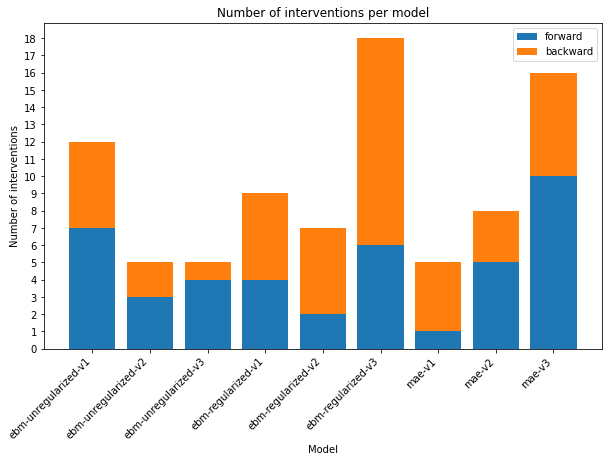

In [9]:
# stacked bar chart of forward/backward interventions per model

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('Number of interventions per model')
plt.xlabel('Model')
plt.ylabel('Number of interventions')
# x ticks rotate and move slightly left
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, 22, 1))

forward_bags = performance_df[performance_df['direction'] == 'forward']
back_bags = performance_df[performance_df['direction'] == 'back']


plt.bar(forward_bags['model_name'], forward_bags['n_interventions'], label='forward')
plt.bar(back_bags['model_name'], back_bags['n_interventions'], bottom=forward_bags['n_interventions'],label= 'backward')

plt.legend()
plt.show()



In [10]:
import sys
sys.path.append('../')
from pathlib import Path


from dataloading.nvidia import NvidiaDataset
from metrics.metrics import calculate_closed_loop_metrics

In [147]:
from sklearn.neighbors import BallTree

class VelocityModel:
    def __init__(self, positions_parquet='positions.parquet', vector_velocity=30):
        self.vector_velocity = vector_velocity
        self.positions_df = pd.read_parquet(positions_parquet)
        self.tree = BallTree(self.positions_df[["position_x", "position_y", "position_x2", "position_y2"]])

    def find_closest_position(self, x, y, yaw):
        x2 = x + (self.vector_velocity * np.cos(yaw))
        y2 = y + (self.vector_velocity * np.sin(yaw))

        closest = self.tree.query([[x, y, x2, y2]])
        distance = closest[0][0][0]
        index = closest[1][0][0]
        return self.positions_df.iloc[index], distance

def trim_human_datasets_to_auto_datasets(human_drive_ds, forward_auto_frames, back_auto_frames):
    velmodel = VelocityModel('~/ros-e2e-workspace/src/e2e_platform/config/speed_models/summer2021-positions.parquet')

    forward_start = forward_auto_frames.iloc[0]
    forward_end = forward_auto_frames.iloc[-1]
    back_start = back_auto_frames.iloc[0]
    back_end = back_auto_frames.iloc[-1]

    forward_start_frame, forward_start_dist = velmodel.find_closest_position(forward_start['position_x'], forward_start['position_y'], forward_start['yaw'])
    forward_end_frame, forward_end_dist = velmodel.find_closest_position(forward_end['position_x'], forward_end['position_y'], forward_end['yaw'])
    back_start_frame, back_start_dist = velmodel.find_closest_position(back_start['position_x'], back_start['position_y'], back_start['yaw'])
    back_end_frame, back_end_dist = velmodel.find_closest_position(back_end['position_x'], back_end['position_y'], back_end['yaw'])

    # print('forward start:', forward_start_dist, forward_start_frame.name)
    # print('forward end:', forward_end_dist, forward_end_frame.name)
    # print('back start:', back_start_dist, back_start_frame.name)
    # print('back end:', back_end_dist, back_end_frame.name)

    human_indices = human_drive_ds.frames.index.to_numpy()
    human_indices_current = human_indices[:-1]
    human_indices_next = human_indices[1:]
    change_of_direction_idx = (human_indices_next < human_indices_current).nonzero()[0].item()

    forward_filtered = human_drive_ds.frames.iloc[forward_start_frame.name:forward_end_frame.name]
    back_filtered = human_drive_ds.frames.iloc[change_of_direction_idx+back_start_frame.name:change_of_direction_idx+back_end_frame.name]

    merged = pd.concat([forward_filtered, back_filtered], ignore_index=True).reset_index(drop=True)
    human_drive_ds.frames = merged

In [154]:
def calculate_metrics(driving_ds, expert_ds):
    metrics_df = pd.DataFrame(columns=["model", "mae", "rmse", "max", "failure_rate", 
                                       "interventions", "whiteness", "expert_whiteness"])

    for name, ds in driving_ds.items():
        print(f"Calculating metrics for {name}")
        cmd_frames = pd.read_csv(ds.dataset_paths[0] / 'vehicle_cmd.csv')
        n_interventions = performance_df[performance_df['model_name'] == name]['n_interventions'].values.sum()
        metrics = calculate_closed_loop_metrics(ds.frames, expert_ds.frames, cmd_frames=cmd_frames, fps=30, distance=4.3*2, interventions=n_interventions)
        metrics['model'] = name
        new_df = pd.DataFrame([metrics])
        metrics_df = pd.concat([metrics_df, new_df], ignore_index=True)

    return metrics_df

In [31]:
root_path = Path('/data/Bolt/drives-nikita-thesis/')
expert_root_path = Path('/data/Bolt/dataset-new-big/summer2021/')

datasets = { row['model_name']: [] for i, row in performance_df.iterrows()}
for i, row in performance_df.iterrows():
    datasets[row['model_name']].append(root_path / row['bag_name'])

datasets = { k: NvidiaDataset(v) for k, v in datasets.items()}

/data/Bolt/drives-nikita-thesis/2022-08-04-18-03-44_elva_forward_ebm_unregularized_v1: length=18175, filtered=0
/data/Bolt/drives-nikita-thesis/2022-08-04-17-51-50_elva_back_ebm_unregularized_v1: length=19394, filtered=0
/data/Bolt/drives-nikita-thesis/2022-08-05-16-52-29_elva_forward_ebm_unregularized_v2: length=18712, filtered=0
/data/Bolt/drives-nikita-thesis/2022-08-05-16-41-01_elva_back_ebm_unregularized_v2: length=18459, filtered=0
/data/Bolt/drives-nikita-thesis/2022-08-05-17-15-21_elva_forward_ebm_unregularized_v3: length=18298, filtered=0
/data/Bolt/drives-nikita-thesis/2022-08-05-17-04-06_elva_back_ebm_unregularized_v3: length=18444, filtered=0
/data/Bolt/drives-nikita-thesis/2022-08-04-16-45-09_elva_forward_ebm_regularized_v1: length=17924, filtered=0
/data/Bolt/drives-nikita-thesis/2022-08-04-16-33-18_elva_back_ebm_regularized_v1: length=18692, filtered=0
/data/Bolt/drives-nikita-thesis/2022-08-04-17-11-04_elva_forward_ebm_regularized_v2: length=18166, filtered=0
/data/Bolt

In [150]:
human_drive = Path('/data/Bolt/dataset-new-big/summer2021/2021-10-26-10-49-06_e2e_rec_ss20_elva')
human_drive_back = Path('/data/Bolt/dataset-new-big/summer2021/2021-10-26-11-08-59_e2e_rec_ss20_elva_back')
human_drive_ds = NvidiaDataset([human_drive, human_drive_back])

# trim human dataset to auto dataset
forward_frames = pd.read_csv('/data/Bolt/drives-nikita-thesis/2022-08-04-17-33-33_elva_forward_ebm_regularized_v3/nvidia_frames.csv')
back_frames = pd.read_csv('/data/Bolt/drives-nikita-thesis/2022-08-04-17-21-58_elva_back_ebm_regularized_v3/nvidia_frames.csv')

trim_human_datasets_to_auto_datasets(human_drive_ds, forward_frames, back_frames)

/data/Bolt/dataset-new-big/summer2021/2021-10-26-10-49-06_e2e_rec_ss20_elva: length=33045, filtered=0
/data/Bolt/dataset-new-big/summer2021/2021-10-26-11-08-59_e2e_rec_ss20_elva_back: length=33281, filtered=0


In [155]:
metrics_df = calculate_metrics(datasets, human_drive_ds)

Calculating metrics for ebm-unregularized-v1
Calculating metrics for ebm-unregularized-v2
Calculating metrics for ebm-unregularized-v3
Calculating metrics for ebm-regularized-v1
Calculating metrics for ebm-regularized-v2
Calculating metrics for ebm-regularized-v3
Calculating metrics for mae-v1
Calculating metrics for mae-v2
Calculating metrics for mae-v3


In [156]:
metrics_df

,model,mae,rmse,max,failure_rate,interventions,whiteness,expert_whiteness,distance,distance_per_intervention,cmd_whiteness
0,ebm-unregularized-v1,0.298672,0.41909,1.713191,3.884585,12,43.817815,18.025095,8.6,0.716667,203.295724
1,ebm-unregularized-v2,0.237804,0.320532,1.624527,1.027122,5,35.154843,18.025095,8.6,1.720000,244.249002
2,ebm-unregularized-v3,0.242642,0.343455,1.7163,2.026688,5,38.060673,18.025095,8.6,1.720000,213.408408
3,ebm-regularized-v1,0.291544,0.394435,1.466353,2.946827,9,31.617399,18.025095,8.6,0.955556,59.506364
4,ebm-regularized-v2,0.291952,0.396317,1.398916,2.941259,7,28.667117,18.025095,8.6,1.228571,66.363760
5,ebm-regularized-v3,0.270965,0.360903,1.648041,1.829726,18,29.445515,18.025095,8.6,0.477778,57.781418
6,mae-v1,0.301088,0.419838,1.722672,4.222724,5,35.647996,18.025095,8.6,1.720000,96.048135
7,mae-v2,0.258497,0.34205,1.714649,0.850121,8,39.763217,18.025095,8.6,1.075000,82.515022
8,mae-v3,0.239537,0.307916,1.190733,0.184021,16,46.098648,18.025095,8.6,0.537500,79.543303


### Offline metrics

In [159]:
import torch
import numpy as np

import sys
from pathlib import Path

sys.path.append('/home/nikita/e2e-driving')

import time
from tqdm.notebook import tqdm
import torch.nn.functional as F
from torch.distributions import Categorical
import math

from ibc import optimizers
from dataloading.nvidia import NvidiaDataset
from metrics.metrics import calculate_open_loop_metrics
from pilotnet import PilotnetEBM, PilotNet
import pandas as pd


In [160]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

@torch.no_grad()
def evaluate(model, dataloader):
    model.eval()
    all_predictions = []
    inference_times = []
    progress_bar = tqdm(total=len(dataloader), smoothing=0)

    epoch_mae = 0.0
    epoch_entropy = 0.0
    ask_batch_timestamp = time.time()
    for i, (input, target, _) in enumerate(dataloader):
        recv_batch_timestap = time.time()

        inputs = input['image'].to(device)
        target = target.to(device, torch.float32)

        inference_start = time.perf_counter()
        preds, energy = model(inputs)
        inference_end = time.perf_counter()

        inference_time = inference_end - inference_start
        inference_times.append(inference_time)

        mae = F.l1_loss(preds, target.view(-1, 1))
        mae_degrees = math.degrees(mae.item())
        epoch_mae += mae_degrees

        entropy = Categorical(F.softmax(-energy, dim=-1)).entropy().mean() / math.log(energy.shape[-1])
        epoch_entropy += entropy.item()

        all_predictions.extend(preds.cpu().squeeze().numpy())

        progress_bar.update(1)
        progress_bar.set_description(f'MAE: {(epoch_mae / (i + 1)):.4f} | Entropy: {(epoch_entropy / (i + 1)):.4f}')

        ask_batch_timestamp = time.time()

    avg_mae = epoch_mae / len(dataloader)
    avg_entropy = epoch_entropy / len(dataloader)
    result = np.array(all_predictions)
    return avg_mae, avg_entropy, result


def calculate_offline_metrics(fps, predictions, valid_loader):
    '''For steering angle only.'''

    frames_df = valid_loader.dataset.frames
    true_steering_angles = frames_df.steering_angle.to_numpy()
    metrics = calculate_open_loop_metrics(predictions, true_steering_angles, fps=fps)
    return metrics

def evaluate_model(model_name, dataloader, fps=30):
    model = PilotnetEBM() if 'ebm' in model_name else PilotNet()
    model = optimizers.DFOptimizerConst(model, optimizers.DerivativeFreeConfig())

    pt_model_path = f'../_models/{model_name}.pt'
    model.load_state_dict(torch.load(pt_model_path))
    model.to(device)
    _, entropy, preds = evaluate(model, dataloader)
    metrics = calculate_metrics(fps, preds, dataloader)
    metrics["entropy"] = entropy

    return metrics

/home/nikita/miniconda3/envs/e2e/lib/python3.9/site-packages/torch/cuda/__init__.py:82: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  /opt/conda/conda-bld/pytorch_1646756402876/work/c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


In [162]:
dataloader = torch.utils.data.DataLoader(human_drive_ds.frames, batch_size=256, shuffle=False, num_workers=8)

In [163]:
evaluate_model('mae-v1', dataloader)

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [ ]:
offline whiteness
offline mae
uncertainty

